In [1]:
import os 
import pandas as pd

data=pd.read_csv(r'',encoding='latin1',sep=';')

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


Read your Titanic dataset as usual: Training set and Testing set Apply decision tree

In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from subprocess import check_output
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import re
import matplotlib.pyplot as plt

In [3]:
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
train=preprocess_data(data)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S


In [4]:
columns = ['Pclass','Sex','Age','Fare','Parch','SibSp']

X = train[columns]
y = train.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Plot your decision tree and try to read the tree branches and conclude a prediction manually

In [72]:
clf = DecisionTreeClassifier(max_depth = 3)
clf.fit(X_train,y_train)
print('Accuracy ',clf.score(X_test,y_test))


Accuracy  0.8169491525423729


[Text(837.0, 951.3000000000001, 'X[1] <= 0.5\ngini = 0.471\nsamples = 596\nvalue = [370, 226]'),
 Text(418.5, 679.5, 'X[0] <= 2.5\ngini = 0.38\nsamples = 204\nvalue = [52, 152]'),
 Text(209.25, 407.70000000000005, 'X[2] <= 3.0\ngini = 0.084\nsamples = 114\nvalue = [5, 109]'),
 Text(104.625, 135.89999999999998, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(313.875, 135.89999999999998, 'gini = 0.069\nsamples = 112\nvalue = [4, 108]'),
 Text(627.75, 407.70000000000005, 'X[3] <= 24.808\ngini = 0.499\nsamples = 90\nvalue = [47, 43]'),
 Text(523.125, 135.89999999999998, 'gini = 0.491\nsamples = 74\nvalue = [32, 42]'),
 Text(732.375, 135.89999999999998, 'gini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(1255.5, 679.5, 'X[2] <= 13.0\ngini = 0.306\nsamples = 392\nvalue = [318, 74]'),
 Text(1046.25, 407.70000000000005, 'X[5] <= 2.5\ngini = 0.486\nsamples = 24\nvalue = [10, 14]'),
 Text(941.625, 135.89999999999998, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(1150.875, 135.899999999

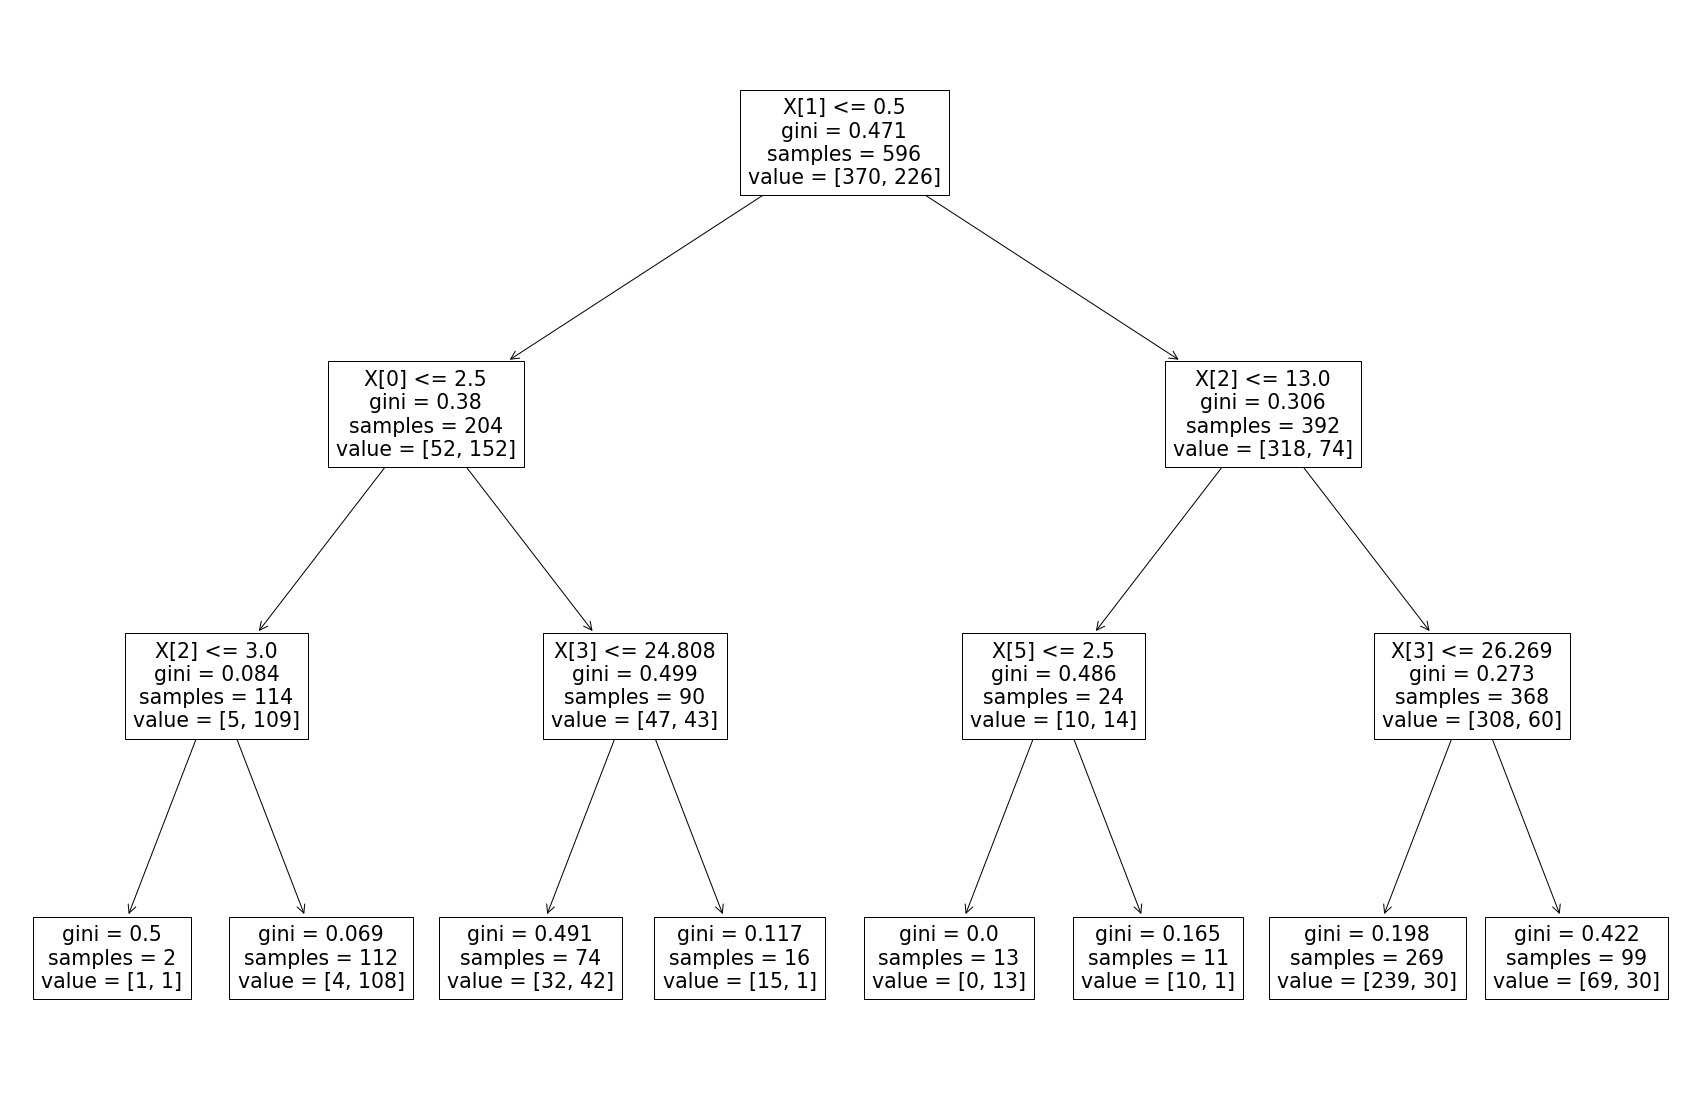

In [18]:
from graphviz import Source
from sklearn import tree
from sklearn.tree import plot_tree
plt.figure(figsize=(30,20))
plot_tree(clf)

In [41]:
#DECISIONB tREE parameter max depth 04 
columns = ['Pclass','Sex','Age','Fare','Parch','SibSp']

X = train[columns]
y = train.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf2 = DecisionTreeClassifier(max_depth = 4)
clf2.fit(X_train,y_train)
print('Accuracy ',clf2.score(X_test,y_test))

Accuracy  0.8203389830508474


[Text(851.9464285714286, 978.48, 'X[1] <= 0.5\ngini = 0.471\nsamples = 596\nvalue = [370, 226]'),
 Text(478.2857142857143, 761.0400000000001, 'X[0] <= 2.5\ngini = 0.38\nsamples = 204\nvalue = [52, 152]'),
 Text(239.14285714285714, 543.6, 'X[2] <= 3.0\ngini = 0.084\nsamples = 114\nvalue = [5, 109]'),
 Text(119.57142857142857, 326.1600000000001, 'X[3] <= 88.775\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(59.785714285714285, 108.72000000000003, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(179.35714285714286, 108.72000000000003, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(358.7142857142857, 326.1600000000001, 'X[3] <= 28.856\ngini = 0.069\nsamples = 112\nvalue = [4, 108]'),
 Text(298.92857142857144, 108.72000000000003, 'gini = 0.162\nsamples = 45\nvalue = [4, 41]'),
 Text(418.5, 108.72000000000003, 'gini = 0.0\nsamples = 67\nvalue = [0, 67]'),
 Text(717.4285714285714, 543.6, 'X[3] <= 24.808\ngini = 0.499\nsamples = 90\nvalue = [47, 43]'),
 Text(597.8571428571429, 326.16000

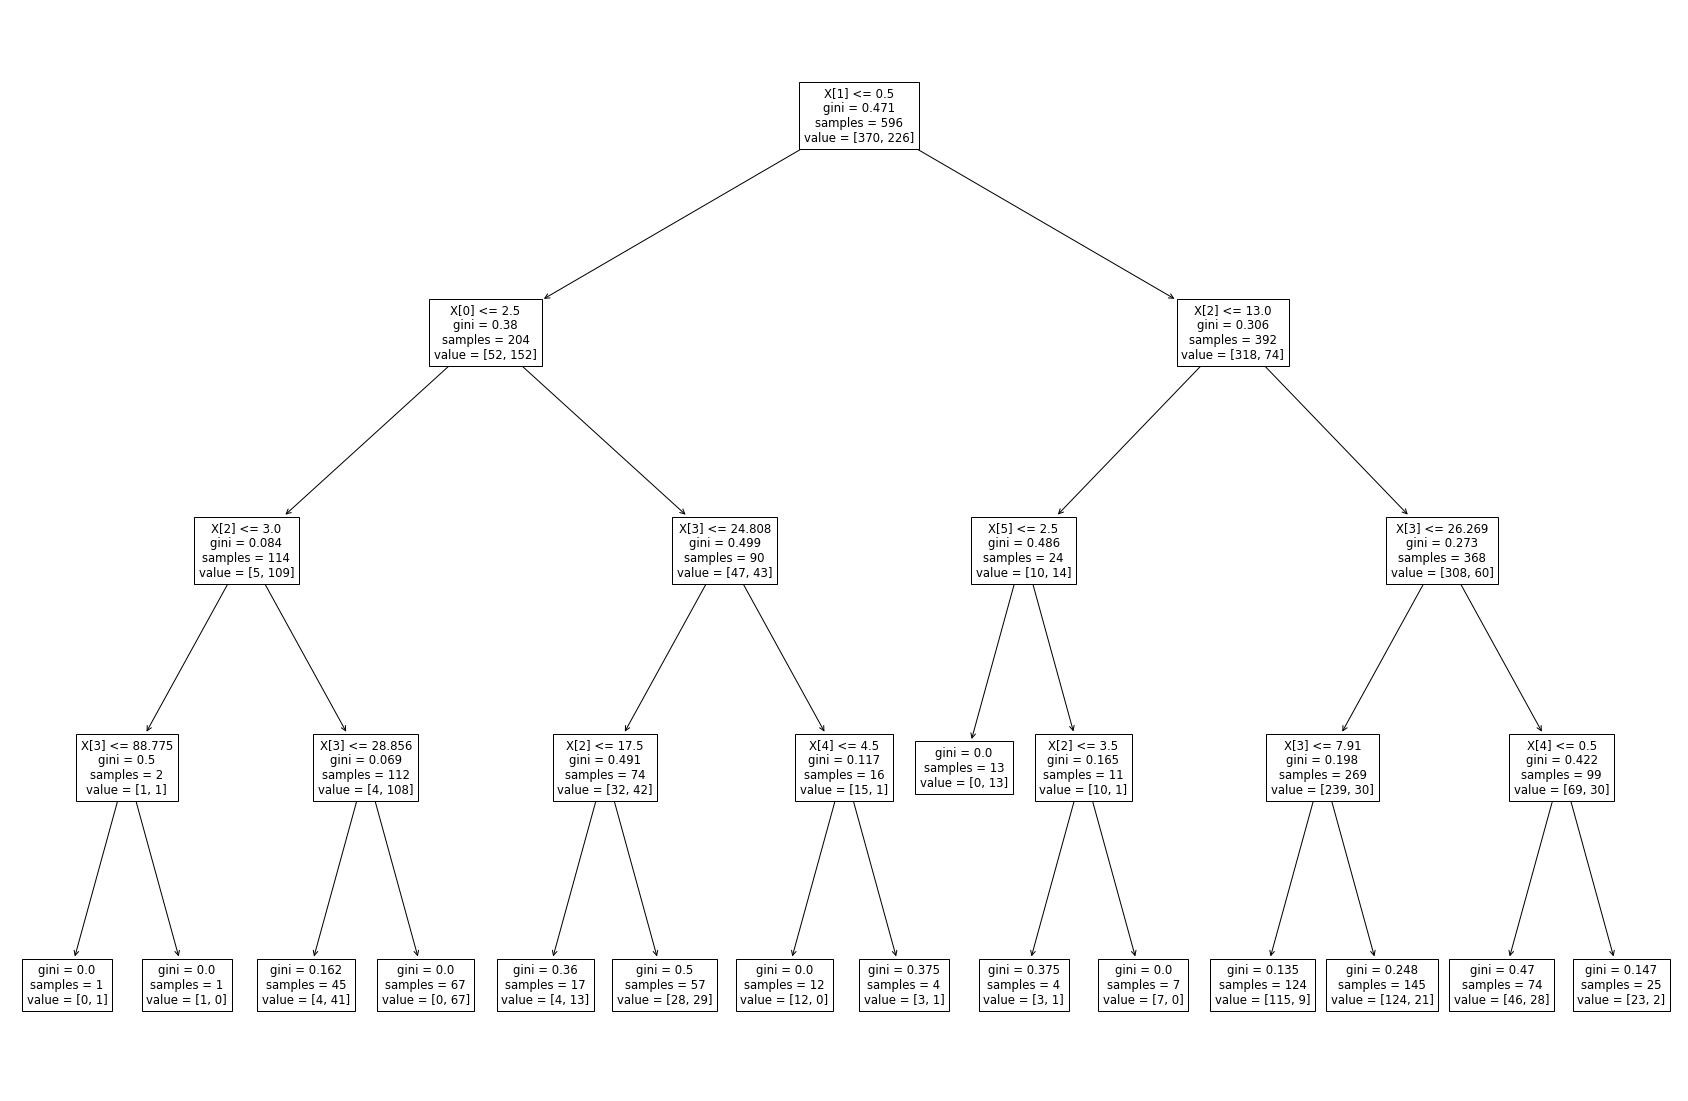

In [42]:
from graphviz import Source
from sklearn import tree
from sklearn.tree import plot_tree
plt.figure(figsize=(30,20))
plot_tree(clf2)

In [69]:
#parameter max depth 5 
columns = ['Pclass','Sex','Age','Fare','Parch','SibSp']

X = train[columns]
y = train.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


clf3 = DecisionTreeClassifier(max_depth = 5)
clf3.fit(X_train,y_train)
print('Accuracy ',clf2.score(X_test,y_test))

Accuracy  0.8203389830508474


[Text(745.7884615384614, 996.6, 'X[1] <= 0.5\ngini = 0.471\nsamples = 596\nvalue = [370, 226]'),
 Text(375.57692307692304, 815.4000000000001, 'X[0] <= 2.5\ngini = 0.38\nsamples = 204\nvalue = [52, 152]'),
 Text(171.69230769230768, 634.2, 'X[2] <= 3.0\ngini = 0.084\nsamples = 114\nvalue = [5, 109]'),
 Text(85.84615384615384, 453.0, 'X[0] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(42.92307692307692, 271.79999999999995, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(128.76923076923077, 271.79999999999995, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(257.53846153846155, 453.0, 'X[3] <= 28.856\ngini = 0.069\nsamples = 112\nvalue = [4, 108]'),
 Text(214.61538461538458, 271.79999999999995, 'X[3] <= 28.231\ngini = 0.162\nsamples = 45\nvalue = [4, 41]'),
 Text(171.69230769230768, 90.59999999999991, 'gini = 0.127\nsamples = 44\nvalue = [3, 41]'),
 Text(257.53846153846155, 90.59999999999991, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(300.46153846153845, 271.7999999999

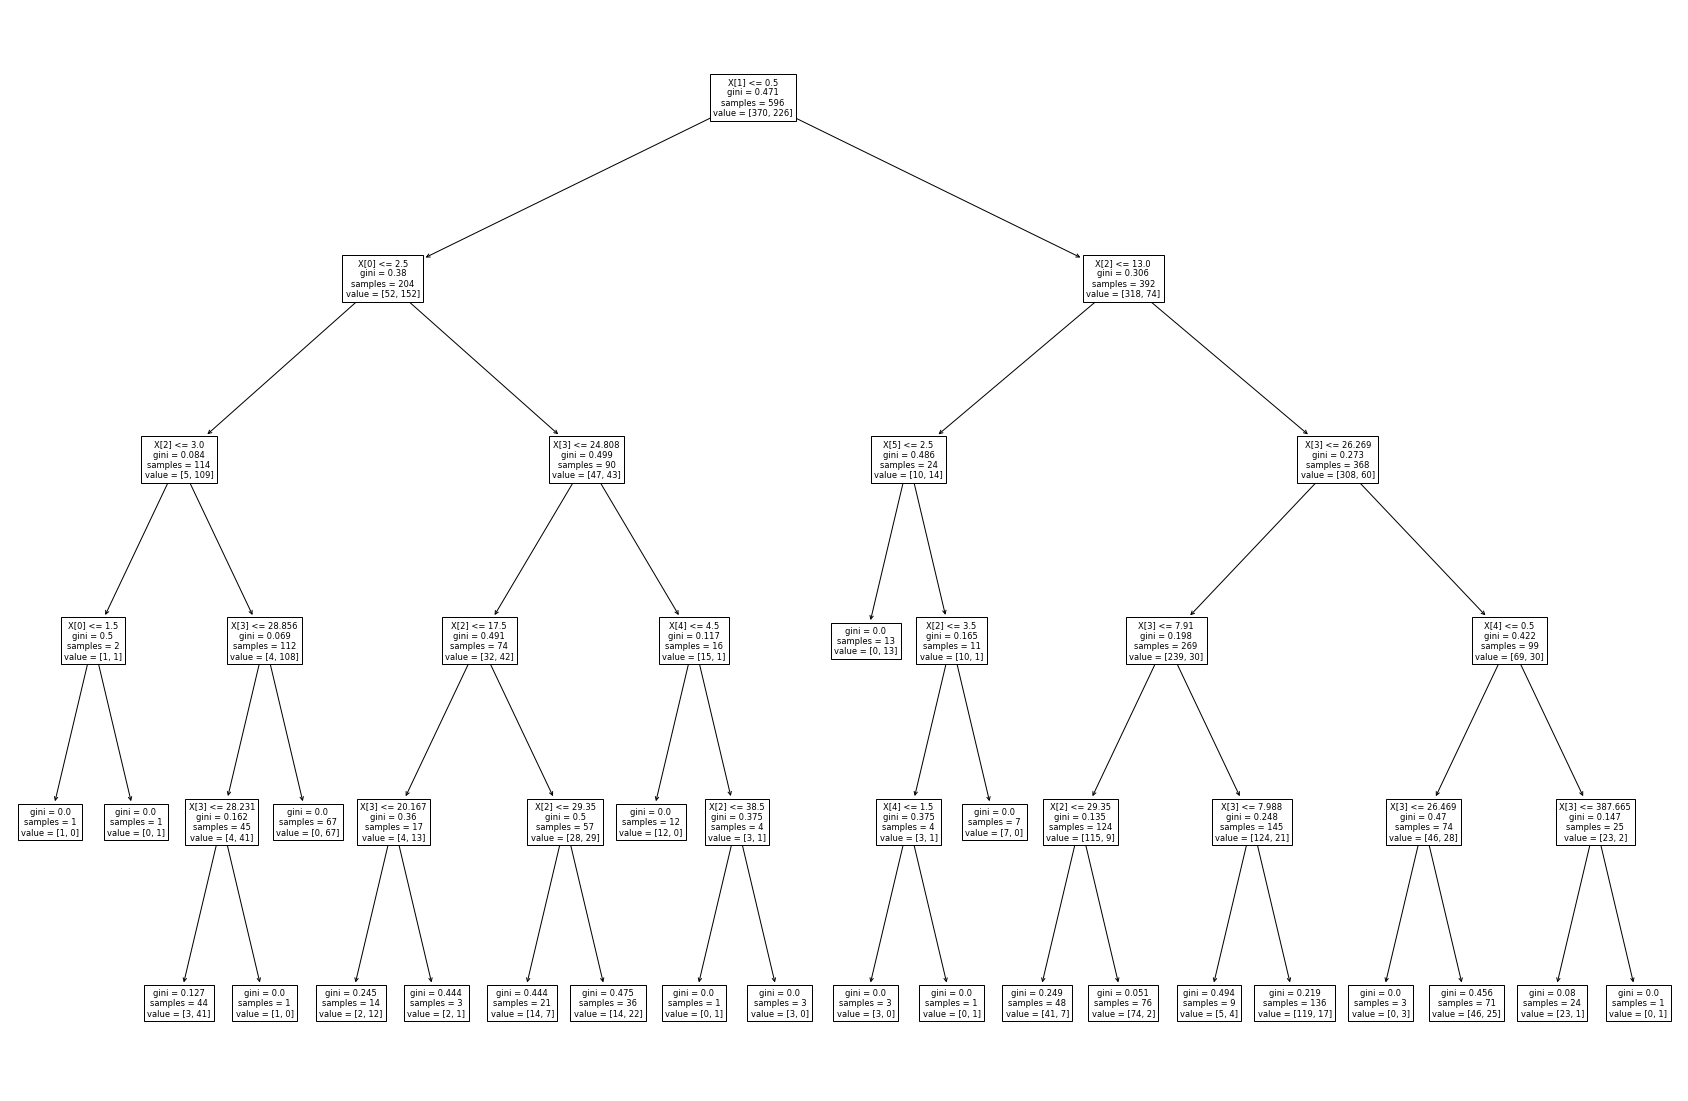

In [45]:
from graphviz import Source
from sklearn import tree
from sklearn.tree import plot_tree
plt.figure(figsize=(30,20))
plot_tree(clf3)

the Best parameter in Tree decision is Survived which have the high accuracy 

In [63]:
# random Forest 
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random For-est Classifier
from sklearn import metrics  # Importing metrics to test accuracy

columns = ['Pclass','Sex','Age','Fare','Parch','SibSp']

X = train[columns]
y = train.Survived
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3) #splitting data with test size of 30%

clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8171641791044776


In [65]:

columns = ['Pclass','Sex','Age','Fare','Parch','SibSp']

X = train[columns]
y = train.Survived


x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3) #splitting data with test size of 30%

clf4=RandomForestClassifier(n_estimators=15)  #Creating a random forest with 100 decision trees
clf4.fit(x_train, y_train)  #Training our model
y_pred=clf4.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.7798507462686567


In [68]:

columns = ['Pclass','Sex','Age','Fare','Parch','SibSp']

X = train[columns]
y = train.Survived


x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3) #splitting data with test size of 30%

clf5=RandomForestClassifier(n_estimators=20)  #Creating a random forest with 100 decision trees
clf5.fit(x_train, y_train)  #Training our model
y_pred=clf5.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.7835820895522388
